## Laplacian Equation

The Laplacian equation in 2D is:

$$ \Delta u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0 $$

## Discretization with Finite Volume Method

1. **Control Volume**: We divide the domain into a grid of control volumes. Each control volume is centered around a grid point \((i, j)\).

2. **Integral Form of the Equation**: Integrate the Laplacian equation over a control volume \(V_{i,j}\):

$$ \int_{V_{i,j}} \Delta u \, dV = 0 $$

3. **Divergence Theorem**: Apply the divergence theorem to convert the volume integral to a surface integral:

$$ \int_{V_{i,j}} \Delta u \, dV = \int_{\partial V_{i,j}} \nabla u \cdot \hat{n} \, dS = 0 $$

   where $\hat{n}$ is the outward-facing normal vector on the boundary $\partial V_{i,j}$.

4. **Surface Integral Approximation**: Approximate the surface integral by summing the fluxes through the faces of the control volume. For a rectangular control volume with sides parallel to the coordinate axes:

$$
\int_{\partial V_{i,j}} \nabla u \cdot \hat{n} \, dS \approx
\left( \frac{\partial u}{\partial x} \bigg|_{i+1/2,j} - \frac{\partial u}{\partial x} \bigg|_{i-1/2,j} \right) \Delta y +
\left( \frac{\partial u}{\partial y} \bigg|_{i,j+1/2} - \frac{\partial u}{\partial y} \bigg|_{i,j-1/2} \right) \Delta x = 0
$$

   Here, $\Delta x$  and $\Delta y$ are the widths of the control volume in the \(x\) and \(y\) directions.

5. **Central Difference Approximation**: Use central differences to approximate the derivatives at the control volume faces:

$$
\frac{\partial u}{\partial x} \bigg|_{i+1/2,j} \approx \frac{u_{i+1,j} - u_{i,j}}{\Delta x}, \quad
\frac{\partial u}{\partial x} \bigg|_{i-1/2,j} \approx \frac{u_{i,j} - u_{i-1,j}}{\Delta x}
$$

$$
\frac{\partial u}{\partial y} \bigg|_{i,j+1/2} \approx \frac{u_{i,j+1} - u_{i,j}}{\Delta y}, \quad
\frac{\partial u}{\partial y} \bigg|_{i,j-1/2} \approx \frac{u_{i,j} - u_{i,j-1}}{\Delta y}
$$

6. **Discrete Equation**: Substitute these approximations into the integral form to obtain the discrete equation:

$$
\Delta y\left(\frac{u_{i+1,j} - u_{i,j}}{\Delta x} - \frac{u_{i,j} - u_{i-1,j}}{\Delta x}\right) +
\Delta x\left(\frac{u_{i,j+1} - u_{i,j}}{\Delta y} - \frac{u_{i,j} - u_{i,j-1}}{\Delta y}\right) = 0
$$

We can simplify the expression as follows:

$$
\Delta y \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2} + \Delta x \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta y^2} = 0
$$



Certainly! We can simplify the expression further:

$$
\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta y^2} = 0
$$

Now, let's write the coefficients in terms of $\Delta x$ and $\Delta y$:

$$
\frac{1}{\Delta x^2} (u_{i+1,j} - 2u_{i,j} + u_{i-1,j}) + \frac{1}{\Delta y^2} (u_{i,j+1} - 2u_{i,j} + u_{i,j-1}) = 0
$$

This can be further rearranged as:

$$
\frac{u_{i+1,j}}{\Delta x^2} + \frac{u_{i-1,j}}{\Delta x^2} - 2\left(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}\right)u_{i,j} + \frac{u_{i,j+1}}{\Delta y^2} + \frac{u_{i,j-1}}{\Delta y^2} = 0
$$

So, the coefficient of $u_{i,j}$ is:

$$
- 2\left(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}\right)
$$

And the coefficients of the neighboring points are:

- For $u_{i+1,j}$ and $u_{i-1,j}$: $\frac{1}{\Delta x^2}$
- For $u_{i,j+1}$ and $u_{i,j-1}$: $\frac{1}{\Delta y^2}$


$$
A=\begin{bmatrix}
-2\left(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}\right) & \frac{1}{\Delta x^2} & 0 & \cdots & \frac{1}{\Delta y^2} & 0 & \cdots & 0 \\
\frac{1}{\Delta x^2} & -2\left(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}\right) & \frac{1}{\Delta x^2} & \cdots & 0 & \frac{1}{\Delta y^2} & \cdots & 0 \\
0 & \frac{1}{\Delta x^2} & -2\left(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}\right) & \cdots & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
\frac{1}{\Delta y^2} & 0 & 0 & \cdots & -2\left(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}\right) & \frac{1}{\Delta x^2} & \cdots & 0 \\
0 & \frac{1}{\Delta y^2} & 0 & \cdots & \frac{1}{\Delta x^2} & -2\left(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}\right) & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 0 & 0 & \cdots & -2\left(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}\right)
\end{bmatrix}
$$













## Python Code Implementation



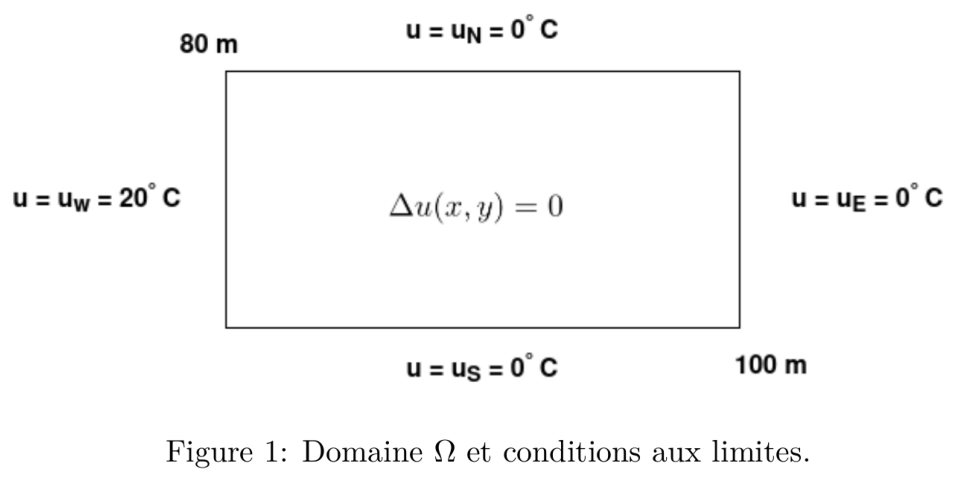

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
image_path = 'geo_dt.png'  
image = Image.open(image_path)
plt.figure(figsize=(30, 6))
plt.imshow(image)
plt.axis('off')  # Optional: turn off the axis
plt.show()

Text(0, 0.5, 'Y')

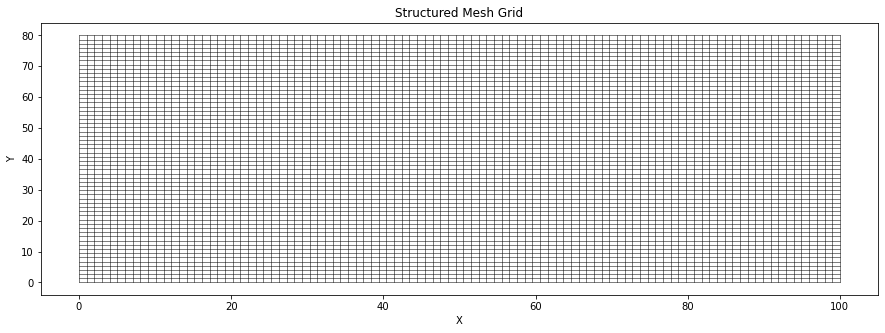

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

import time

# Parameters
Nx, Ny = 100, 60 # Number of grid points
Lx, Ly = 100.0, 80.0  # Physical dimensions of the grid
#=====================================================================
lx, ly = 100.0, 80.0 
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1) 
num_points=Nx*Ny

plt.figure(figsize=(15, 5))
x = np.linspace(0, Lx, Nx)  # Create Nx equally spaced points between 0 and 1
y = np.linspace(0, Ly, Ny)  # Create Ny equally spaced points between 0 and 1
for i in range(Nx):
    plt.plot([x[i], x[i]], [y[0], y[-1]], 'k-', linewidth=0.5)
for j in range(Ny):
    plt.plot([x[0], x[-1]], [y[j], y[j]], 'k-', linewidth=0.5)
X, Y = np.meshgrid(x, y)
plt.title('Structured Mesh Grid')
plt.xlabel('X')
plt.ylabel('Y')

CPU_time =  56.18960499763489


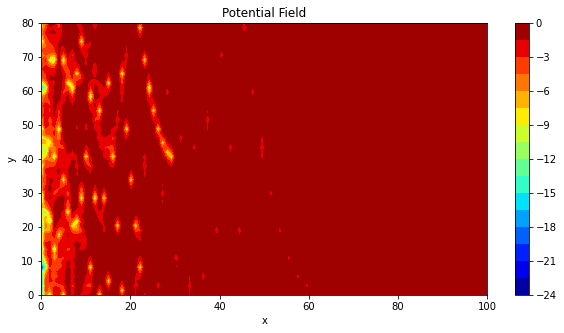

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
import time
start_time = time.time()



# Create the coefficient matrix A and right-hand side vector b
A = np.zeros((num_points, num_points))
b = np.zeros(num_points)


A1=np.diagflat([-2*(1/dx**2 +1/dy**2) for i in range(num_points)])
A2=np.diagflat([1/dx**2 for i in range(num_points-1)],1)
A3=np.diagflat([1/dx**2 for i in range(num_points-1)],-1)
A4=np.zeros((num_points, num_points))
k=2
j=0
while 2*j+2 < (num_points):
    k=2*j+2
    A4[j][k]=1/dy**2
    A4[k][j]=1/dy**2
    j+=1
A=A1+A2+A3+A4  

index=0
for i in range(Ny):
    index+=i
    b[index] = 20
            
#A = A.tocsr()

# Solve the linear system
phi = np.linalg.solve(A, b)
end_time = time.time()

print('CPU_time = ',end_time-start_time)
phi = phi.reshape((Nx, Ny))

X, Y = np.meshgrid(np.linspace(0, lx, Nx), np.linspace(0, ly, Ny))
plt.figure(figsize=(10, 5))
plt.contourf(X, Y, phi.T, 20, cmap='jet')
plt.colorbar()
plt.title('Potential Field')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
